## Final Project Submission

Please fill out:
* Student name: Jenyl Murdock
* Student pace: part time 
* Scheduled project review date/time: 
* Instructor name: Joe San Pietro
* Blog post URL:


In [ ]:
# Your code here - remember to use markdown cells for comments as well!

In [1]:
# access the data file and get a visual of the information

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Check for multicollinearity
import seaborn as sns

# look at results for each linear regression model using statsmodels
import statsmodels.formula.api as smf

kc = pd.read_csv('kc_house_data.csv')
print (kc.shape)
kc.head(10)

(21597, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


Insert description of column names, grade, & condition here

For bathrooms:
Values are decimal and calculated as:
Full bathrooms (ensuite) = 1
Half bathrooms (separate )= 0.5
Powder rooms (only toilet and sink) = 0.25
(Dahlin, 2016)

In [ ]:
# check to see how each column is categorized
kc.info()

II.  Scrub the data

In [2]:
# The id column is not needed so it can be dropped from the data
kc = kc.drop(['id'], axis=1)
kc.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [ ]:
B.  Remove null values

In [ ]:
# Check for null values in the dataset 
kc.isna().sum()

View has 63 null values.  Because this is not a significant number, these can be dropped from our data

In [ ]:
print (kc.view.unique())
print (kc.view.value_counts())

In [3]:
# select only the data for where the view is not a nan value
# convert view to data type string so the 'nan' data can be dropped
kc['view'] = kc.view.astype(str)
kc = kc[kc.view != 'nan']  
kc['view'] = kc.view.astype(float)
kc['view'] = kc.view.astype(int)


In [4]:
# replace null values with 0 in waterfront column and change to data type integer
kc.waterfront = kc.waterfront.fillna(value=0)
kc.waterfront = kc.waterfront.astype(int)
kc.waterfront = kc.waterfront.astype('category')

In [5]:
# replace null values in yr_renovated with 0 and change to data type integer
kc.yr_renovated = kc.yr_renovated.fillna(value=0)
kc.yr_renovated = kc.yr_renovated.astype(int)

In [ ]:
# Verify that there are not any more null values
kc.isna().sum()

C.  reformat some columns and remove outliers

In [6]:
# Start with an initial data type conversion
# For columns that are obviouly categorized wrong, convert them to an appropriate data type
kc['date'] = pd.to_datetime(kc.date)
kc['condition'] = kc.condition.astype(int)
kc['grade'] = kc.grade.astype(int)

kc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 20 columns):
date             21534 non-null datetime64[ns]
price            21534 non-null float64
bedrooms         21534 non-null int64
bathrooms        21534 non-null float64
sqft_living      21534 non-null int64
sqft_lot         21534 non-null int64
floors           21534 non-null float64
waterfront       21534 non-null category
view             21534 non-null int64
condition        21534 non-null int64
grade            21534 non-null int64
sqft_above       21534 non-null int64
sqft_basement    21534 non-null object
yr_built         21534 non-null int64
yr_renovated     21534 non-null int64
zipcode          21534 non-null int64
lat              21534 non-null float64
long             21534 non-null float64
sqft_living15    21534 non-null int64
sqft_lot15       21534 non-null int64
dtypes: category(1), datetime64[ns](1), float64(5), int64(12), object(1)
memory usage: 3.3+ MB


In [7]:
# Convert the year built to reflect the age of the house. This format will be easier to visualize
# https://github.com/matthewsparr/King-County-Sales-Analysis/blob/master/student2.ipynb
kc['yr_built'].describe()
kc['age'] = (kc.yr_built.max() - kc.yr_built + 1)
kc = kc.drop(['yr_built'], axis=1)
kc.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0.0,0,98178,47.5112,-122.257,1340,5650,61
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400.0,1991,98125,47.7210,-122.319,1690,7639,65


The bedrooms data contains one significant outlier of 33 which could very well be a data entry error.
There are 38 houses with 7 bedrooms, 13 houses with 8 bedrooms, 6 with 9 bedrooms, 3 with 10, 1 with 11
Example code used for this information:  (kc.bedrooms == 9).sum()

In [8]:
# Use only the values from 1-6 bedrooms
print (kc.bedrooms.value_counts())
kc = kc[kc['bedrooms'] < 7]
kc.bedrooms.unique()

3     9791
4     6865
2     2754
5     1596
6      270
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64


array([3, 2, 4, 5, 1, 6])

In [ ]:
# Check columns for unusable data by looking at the unique values for each variable

In [ ]:
kc.floors.unique()

In [9]:
kc.bathrooms.unique()
kc.condition.unique()
kc.grade.unique()
kc.sqft_living.unique() 
kc.sqft_lot.unique()
kc.condition.unique()
kc.grade.unique()
kc.sqft_above.unique()
kc.sqft_basement.unique()  # '?' in the data

(kc.sqft_basement =='?').sum()  # there are 450 '?' in this column
#(kc.sqft_basement == '0.0').sum()  # there are 12798 '0.0' values in this column

450

In [10]:
# Replace the '?' values with 0 i the sqft_basement data
kc['sqft_basement'] = (kc['sqft_basement'].replace('?', 0)).astype(float)
kc['sqft_basement'] = kc['sqft_basement'].astype(int)

# Instead of square feet values for the basement, let's just use a categorical value of 1 for if it has a basement
# and 0 for if it does not have a basement.
# https://github.com/matthewsparr/King-County-Sales-Analysis/blob/master/student2.ipynb
kc['basement'] = kc['sqft_basement'].apply(lambda row: 0 if row == 0 else 1) 
print(kc['basement'].unique())
kc.basement = kc.basement.astype('category')


[0 1]


In [11]:
print (kc['view'].value_counts())

# A significant majority of the values for the variable view are 0, let's just use a categorical value of 1 for 
# if it has a view and 0 for if it does not have a view.
# https://github.com/matthewsparr/King-County-Sales-Analysis/blob/master/student2.ipynb

kc['has_view'] = kc['view'].apply(lambda row: 1 if row != 0 else 0)
print (kc['has_view'].unique())
kc.has_view = kc.has_view.astype('category')


0    19371
2      952
3      507
1      327
4      315
Name: view, dtype: int64
[0 1]


In [ ]:
# Check that all data is converted to appropriate data type
kc.info()

In [ ]:
# Set up the matplotlib figure and generate a heatmap of the data
f, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(kc.corr(), center = 0, linewidths = .25);

It looks like sqft_living, grade has high collinearity with some other features

A correlation is consider high if its absolute value is around 0.7 - 0.8.
Let's use 0.75 as a guide to see how many high correlations there are.
This showed a high correlation between sqft_lot and sqft_lot15.  Let's go ahead and
drop the sqft_lot15 variable

In [ ]:
print (abs(kc.corr() > 0.75))

In [ ]:
# Get an initial visualization of the data
# Note:  extra white space on either side of the graph indicates outliers which need to be removed
kc.hist(figsize=(15,15));

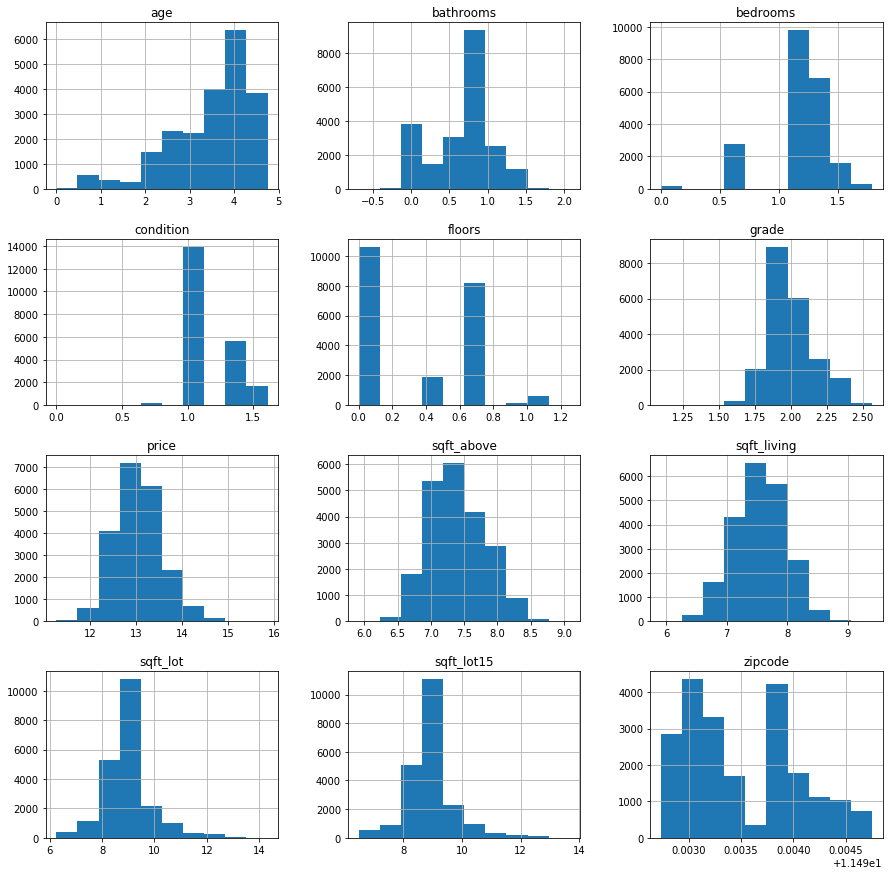

In [12]:
# Normalize the data using log transformation
# the variables basement, age, has_view, yr_renovated cannot be log transformed due to their values of 0

import numpy as np
kc_log = pd.DataFrame([])

kc_log['price'] = np.log(kc.price)
kc_log['bathrooms'] = np.log(kc.bathrooms)
kc_log['bedrooms'] = np.log(kc.bedrooms)
kc_log['condition'] = np.log(kc.condition)
kc_log['age'] = np.log(kc.age)
kc_log['floors'] = np.log(kc.floors)
kc_log['grade'] = np.log(kc.grade)
#kc_log['lat'] = np.log(kc.lat)
#kc_log['long'] = np.log(kc.long) - this produced a problem, got filled with null values
kc_log['sqft_above'] = np.log(kc.sqft_above)
kc_log['sqft_living'] = np.log(kc.sqft_living)
kc_log['sqft_lot'] = np.log(kc.sqft_lot)
kc_log['sqft_lot15'] = np.log(kc.sqft_lot15)
kc_log['zipcode'] = np.log(kc.zipcode)

# look at the histograms of the transformed data
kc_log.hist(figsize = (15,15));

Because bedrooms, condition, & floors could not be coerced into a normal distribution, they should be
considered for elimination.  Also latitude & longitude should be considered.

In [13]:
# Convert categorical columns to numeric format with one-hot encoding

#cond_dummies = pd.get_dummies(kc.condition, prefix = 'condition')
has_view_dummies = pd.get_dummies(kc.has_view, prefix = 'view')
water_dummies = pd.get_dummies(kc.waterfront, prefix = 'waterfront')
basement_dummies = pd.get_dummies(kc.basement, prefix = 'basement')

# drop the original columns that were converted to categorical 
# and combine the log transformed data with the categorical dummy variables

kc = kc.drop(['view', 'has_view', 'waterfront', 'sqft_basement', 'basement'], axis=1)
kc_log = pd.concat([kc_log, has_view_dummies, water_dummies, basement_dummies], axis=1)


In [ ]:
# set the max_columns attribute in order to view all of the column names with the categorical data
pd.set_option('display.max_columns', None)
kc_log.head()

In [14]:
# run an OLS regression on the log transformed continuous variables

col_names = kc_log.columns[1:11]
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p_value']]

for idx, val in enumerate(col_names):
    print ('Kings County:  Price ~ ' + val)
    print ('-------------------------------------')
    
    f = 'price~' + val
    model = smf.ols(formula = f, data = kc_log).fit()
    X_new = pd.DataFrame({val: [kc_log[val].min(), kc_log[val].max()]});
    predic = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1]])
    print (results[idx+1])

Kings County:  Price ~ bathrooms
-------------------------------------
['bathrooms', 0.26895065646310723, 12.576007246311427, 0.6960486915629536, 0.0]
Kings County:  Price ~ bedrooms
-------------------------------------
['bedrooms', 0.1154278790162041, 12.296145794243362, 0.6384967023748339, 0.0]
Kings County:  Price ~ condition
-------------------------------------
['condition', 0.0017702645572801323, 12.899066385524035, 0.12190114048083744, 6.929568385918046e-10]
Kings County:  Price ~ age
-------------------------------------
['age', 0.020093491017234455, 13.324576043331854, -0.07970880757776055, 8.925801751493214e-97]
Kings County:  Price ~ floors
-------------------------------------
['floors', 0.10349306804055725, 12.88437860128595, 0.4797643237655471, 0.0]
Kings County:  Price ~ grade
-------------------------------------
['grade', 0.48045498311948553, 8.106434309209623, 2.4405169716838664, 0.0]
Kings County:  Price ~ sqft_above
-------------------------------------
['sqft_abov

In [15]:
# Convert the results table to a dataframe
print ()
print ('1st iteration - OLS with log transformed categorical variables')
pd.DataFrame(results)



1st iteration - OLS with log transformed categorical variables


,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p_value
1,bathrooms,0.268951,12.576,0.696049,0
2,bedrooms,0.115428,12.2961,0.638497,0
3,condition,0.00177026,12.8991,0.121901,6.92957e-10
4,age,0.0200935,13.3246,-0.0797088,8.9258e-97
5,floors,0.103493,12.8844,0.479764,0
6,grade,0.480455,8.10643,2.44052,0
7,sqft_above,0.341914,7.7192,0.720526,0
8,sqft_living,0.453631,6.7321,0.836495,0
9,sqft_lot,0.0189377,12.3265,0.0800983,2.87805e-91


In [16]:
print()
print (model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     332.8
Date:                Fri, 19 Apr 2019   Prob (F-statistic):           8.62e-74
Time:                        22:06:05   Log-Likelihood:                -16479.
No. Observations:               21472   AIC:                         3.296e+04
Df Residuals:                   21470   BIC:                         3.298e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3309      0.039    313.035      0.

The p-value does not give us any significant value that shows a variable should be removed.
The three highest r-squared values are for grade, sqft_above, and sqft_living 

Remove obvious variables such as:
    p-value > .05 &
    r squared value that are very close to 0

In [17]:
# In this situation, longitude and latitude are not very predictive and can be eliminated. (They were not included
# in the log transformed data)  They need each other in order to have any meaning and for now,
# zipcode does a similar function in one variable.  (move this comment to earlier in the code)

# The variable sqft_living has a lot of correlation as seen in the heat map.

drop_cols = ['condition', 'sqft_lot15', 'sqft_lot15']
kc_log = kc_log.drop(drop_cols, axis=1)


After removing the first round of variables, run the OLS again on the remaining variables.
Since a few columns have been deleted, the column indices need to be adjusted

In [ ]:
# check the column indices as some have been removed
kc_log.head(2)

In [18]:
col_names = kc_log.columns[1:9]

results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p_value']]

for idx, val in enumerate(col_names):
    print()
    print ('Kings County:  Price ~ ' + val)
    print ('-------------------------------------')
    
    f = 'price~' + val
    model = smf.ols(formula = f, data = kc_log).fit()
    X_new = pd.DataFrame({val: [kc_log[val].min(), kc_log[val].max()]});
    predic = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1]])
    print (results[idx+1])


Kings County:  Price ~ bathrooms
-------------------------------------
['bathrooms', 0.26895065646310723, 12.576007246311427, 0.6960486915629536, 0.0]

Kings County:  Price ~ bedrooms
-------------------------------------
['bedrooms', 0.1154278790162041, 12.296145794243362, 0.6384967023748339, 0.0]

Kings County:  Price ~ age
-------------------------------------
['age', 0.020093491017234455, 13.324576043331854, -0.07970880757776055, 8.925801751493214e-97]

Kings County:  Price ~ floors
-------------------------------------
['floors', 0.10349306804055725, 12.88437860128595, 0.4797643237655471, 0.0]

Kings County:  Price ~ grade
-------------------------------------
['grade', 0.48045498311948553, 8.106434309209623, 2.4405169716838664, 0.0]

Kings County:  Price ~ sqft_above
-------------------------------------
['sqft_above', 0.3419138262096143, 7.719202697152994, 0.7205261497095985, 0.0]

Kings County:  Price ~ sqft_living
-------------------------------------
['sqft_living', 0.453631

In [19]:
# Convert the continuous variables results table to a dataframe
print ()
print ('2nd Iteration - OLS with log transformed categorical variables')
pd.DataFrame(results)


2nd Iteration - OLS with log transformed categorical variables


,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p_value
1,bathrooms,0.268951,12.576,0.696049,0
2,bedrooms,0.115428,12.2961,0.638497,0
3,age,0.0200935,13.3246,-0.0797088,8.9258e-97
4,floors,0.103493,12.8844,0.479764,0
5,grade,0.480455,8.10643,2.44052,0
6,sqft_above,0.341914,7.7192,0.720526,0
7,sqft_living,0.453631,6.7321,0.836495,0
8,sqft_lot,0.0189377,12.3265,0.0800983,2.87805e-91


In [ ]:
print()
print (model.summary())

In [20]:
# drop columns
drop_cols =['age', 'sqft_lot']

kc_log = kc_log.drop(drop_cols, axis=1)


In [ ]:
kc_log.head(2)

In [21]:
# now run another OLS regression with the categorical variables
col_names = kc_log.columns[8:] 

results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p_value']]

for idx, val in enumerate(col_names):
    print ('Kings County:  Price ~ ' + val)
    print ('-------------------------------------')
    
    f = 'price~' + val
    model = smf.ols(formula = f, data = kc_log).fit()
    X_new = pd.DataFrame({val: [kc_log[val].min(), kc_log[val].max()]});
    predic = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1]])
    print (results[idx+1])

Kings County:  Price ~ view_0
-------------------------------------
['view_0', 0.10853039065540726, 13.572003214094797, -0.5824624930333461, 0.0]
Kings County:  Price ~ view_1
-------------------------------------
['view_1', 0.10853039065540726, 12.989540721061427, 0.5824624930333192, 0.0]
Kings County:  Price ~ waterfront_0
-------------------------------------
['waterfront_0', 0.028844986541047613, 14.128527798597172, -1.0893504398643135, 1.1167590211821743e-138]
Kings County:  Price ~ waterfront_1
-------------------------------------
['waterfront_1', 0.028844986541047613, 13.039177358732934, 1.0893504398641727, 1.1167590212709337e-138]
Kings County:  Price ~ basement_0
-------------------------------------
['basement_0', 0.042891990048145145, 13.184355479515656, -0.2236986012295658, 1.0843955726302991e-206]
Kings County:  Price ~ basement_1
-------------------------------------
['basement_1', 0.04289199004814481, 12.960656878286073, 0.22369860122957846, 1.0843955725730358e-206]


In [ ]:
 # convert the categorical variables results table to a dataframe
print ()
print ('1st iteration - OLS with categorical variables')
pd.DataFrame(results)

In [ ]:
print (model.summary())

In [ ]:
# Evaluate whether any categorical variables should be eliminated

In [22]:
# not sure about which ones. 
drop_cols = ['basement_0', 'basement_1']
kc_log = kc_log.drop(drop_cols, axis=1)

In [23]:
# now run a second OLS regression with the remaining categorical variables and the dependent variable
col_names = kc_log.columns[8:]  
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p_value']]

for idx, val in enumerate(col_names):
    print ('Kings County:  Price ~ ' + val)
    print ('-------------------------------------')
    
    f = 'price~' + val
    model = smf.ols(formula = f, data = kc_log).fit()
    X_new = pd.DataFrame({val: [kc_log[val].min(), kc_log[val].max()]});
    predic = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1]])
    print (results[idx+1])

Kings County:  Price ~ view_0
-------------------------------------
['view_0', 0.10853039065540726, 13.572003214094797, -0.5824624930333461, 0.0]
Kings County:  Price ~ view_1
-------------------------------------
['view_1', 0.10853039065540726, 12.989540721061427, 0.5824624930333192, 0.0]
Kings County:  Price ~ waterfront_0
-------------------------------------
['waterfront_0', 0.028844986541047613, 14.128527798597172, -1.0893504398643135, 1.1167590211821743e-138]
Kings County:  Price ~ waterfront_1
-------------------------------------
['waterfront_1', 0.028844986541047613, 13.039177358732934, 1.0893504398641727, 1.1167590212709337e-138]


In [ ]:
 # convert the remaining categorical variable results table to a dataframe
print ()
print ('2nd iteration - OLS with categorical variables')
pd.DataFrame(results)

In [ ]:
print (model.summary())

In [25]:
# dropped these to see what would happen to my results -> r-squared actually went down from 58+% to 56+%
drop_cols = ['bedrooms', 'floors', 'view_0', 'view_1']
kc_log = kc_log.drop(drop_cols, axis=1)

In [26]:
# run an ols on all of the remaining variables
col_names = kc_log.columns[1:]  
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p_value']]

for idx, val in enumerate(col_names):
    print ('Kings County:  Price ~ ' + val)
    print ('-------------------------------------')
    
    f = 'price~' + val
    model = smf.ols(formula = f, data = kc_log).fit()
    X_new = pd.DataFrame({val: [kc_log[val].min(), kc_log[val].max()]});
    predic = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1]])
    print (results[idx+1])

Kings County:  Price ~ bathrooms
-------------------------------------
['bathrooms', 0.26895065646310723, 12.576007246311427, 0.6960486915629536, 0.0]
Kings County:  Price ~ grade
-------------------------------------
['grade', 0.48045498311948553, 8.106434309209623, 2.4405169716838664, 0.0]
Kings County:  Price ~ sqft_above
-------------------------------------
['sqft_above', 0.3419138262096143, 7.719202697152994, 0.7205261497095985, 0.0]
Kings County:  Price ~ sqft_living
-------------------------------------
['sqft_living', 0.45363133540752576, 6.7320968769376925, 0.8364953415622339, 0.0]
Kings County:  Price ~ zipcode
-------------------------------------
['zipcode', 0.0015043390931859246, 442.25561142932986, -37.34357935149324, 1.306444136390626e-08]
Kings County:  Price ~ waterfront_0
-------------------------------------
['waterfront_0', 0.028844986541047613, 14.128527798597172, -1.0893504398643135, 1.1167590211821743e-138]
Kings County:  Price ~ waterfront_1
-------------------

In [27]:
 # convert the remaining variables results table to a dataframe
print ()
print ('OLS with remaining variables')
pd.DataFrame(results)


OLS with remaining variables


,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p_value
1,bathrooms,0.268951,12.576,0.696049,0
2,grade,0.480455,8.10643,2.44052,0
3,sqft_above,0.341914,7.7192,0.720526,0
4,sqft_living,0.453631,6.7321,0.836495,0
5,zipcode,0.00150434,442.256,-37.3436,1.30644e-08
6,waterfront_0,0.028845,14.1285,-1.08935,1.11676e-138
7,waterfront_1,0.028845,13.0392,1.08935,1.11676e-138


In [28]:
print (model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     637.7
Date:                Fri, 19 Apr 2019   Prob (F-statistic):          1.12e-138
Time:                        22:09:37   Log-Likelihood:                -16330.
No. Observations:               21472   AIC:                         3.266e+04
Df Residuals:                   21470   BIC:                         3.268e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0392      0.004   3678.254   

Model Validation - using a train-test-split

In [29]:
X = kc_log.drop(['price'], axis=1)
y = kc_log['price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

yhat_train = linreg.predict(X_train)
yhat_test = linreg.predict(X_test)

# look at the residuals
train_residuals = yhat_train - y_train
test_residuals = yhat_test - y_test

print ('Training Data Residuals: ', train_residuals)
print ()
print ()
print ('Test Data Residuals: ', test_residuals)




Training Data Residuals:  20477   -0.205466
7458     0.229171
8776    -0.779240
20329   -0.266963
13132    0.271452
14370   -0.210091
12958    0.619494
19311    0.723605
18470   -0.292105
18636   -0.316736
7209    -0.193815
15789   -0.157967
15494   -0.509237
2187    -0.268405
19115   -0.293739
15357   -0.583080
8815     0.101094
17474   -0.218016
862     -0.155953
9013     0.423640
2955    -0.167773
17024   -0.126003
19378    0.316402
8437     0.082981
17259    0.355700
9617     0.370487
7382     0.250093
12898    0.181880
16669    0.321906
20493    0.464850
           ...   
7227     0.339540
1496    -0.370524
14930   -0.321251
4140    -0.012310
4610     0.164255
5687     0.108492
13555    0.180478
884     -0.966362
19637   -0.019369
18015   -0.139375
6874    -0.212186
2475    -0.624292
623     -0.320413
16773    0.345635
2795    -0.754193
18937    0.448449
19710   -0.481283
16718    0.499845
12378   -0.433134
14506   -0.018850
14377   -0.059788
12625   -0.328777
4336    -0.189185
21

In [30]:
print (linreg.score(X,y))

0.566729745199124


In [31]:
# mean squarred error
mse_train = np.sum((y_train - yhat_train)**2) / len(y_train)
mse_test= np.sum((y_test - yhat_test)**2) / len(y_test)

print ('Train Mean Squarred Error: ', mse_train)
print ('Test Mean Squarred Error: ', mse_test)

Train Mean Squarred Error:  0.1192728876360642
Test Mean Squarred Error:  0.12069535034238721


In [ ]:
# I don't think the mse's look good :(